In [41]:
!pip install matplotlib

     |████████████████████████████████| 12.5MB 1.3MB/s eta 0:00:01    |███████████▍                    | 4.4MB 2.0MB/s eta 0:00:05
  Using cached https://files.pythonhosted.org/packages/81/c5/9831f281c6fb57945e83fdf39ff036cacfdc84aa1988bb3150b330533050/kiwisolver-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

In [2]:
df = pd.read_csv('JCS_metabolomics_data.csv')
df

,Unnamed: 0,metabolite,intensity,temperature,strain
0,0,xanthine,879,30,WT
1,1,valine,350124,30,WT
2,2,uridine-5'-monophosphate,3724,30,WT
3,3,uridine,637,30,WT
4,4,urea,13551,30,WT
...,...,...,...,...,...
2615,126,3-hydroxy-3-methylglutaric acid,391,37,datg32
2616,127,3-aminoisobutyric acid,268,37,datg32
2617,128,2-methylglyceric acid NIST,4151,37,datg32
2618,129,2-hydroxyglutaric acid,1030,37,datg32


In [8]:
ddf = (
    df
        .groupby(['metabolite', 'temperature', 'strain'])
        .agg({'intensity':list})
)
ddf

intensity
metabolite                 temperature strain                                          
2,5-dihydroxypyrazine NIST 30          WT                 [1860, 1008, 1609, 697, 1130]
                                       datg32               [670, 863, 901, 1397, 1972]
                           37          WT                [1131, 1001, 1194, 1310, 1555]
                                       datg32              [1492, 1674, 808, 864, 1220]
2-hydroxyglutaric acid     30          WT                     [374, 342, 250, 508, 243]
...                                                                                 ...
valine                     37          datg32  [377864, 351425, 329279, 380252, 398094]
xanthine                   30          WT                    [879, 690, 451, 1053, 874]
                                       datg32                [917, 1203, 255, 798, 985]
                           37          WT                   [432, 1046, 1429, 957, 965]
                                       datg32             [1339, 1338, 970, 1151, 1157]

[524 rows x 1 columns]

In [14]:
dddf = pd.DataFrame(ddf.to_records())
dddf

,metabolite,temperature,strain,intensity
0,"2,5-dihydroxypyrazine NIST",30,WT,"[1860, 1008, 1609, 697, 1130]"
1,"2,5-dihydroxypyrazine NIST",30,datg32,"[670, 863, 901, 1397, 1972]"
2,"2,5-dihydroxypyrazine NIST",37,WT,"[1131, 1001, 1194, 1310, 1555]"
3,"2,5-dihydroxypyrazine NIST",37,datg32,"[1492, 1674, 808, 864, 1220]"
4,2-hydroxyglutaric acid,30,WT,"[374, 342, 250, 508, 243]"
...,...,...,...,...
519,valine,37,datg32,"[377864, 351425, 329279, 380252, 398094]"
520,xanthine,30,WT,"[879, 690, 451, 1053, 874]"
521,xanthine,30,datg32,"[917, 1203, 255, 798, 985]"
522,xanthine,37,WT,"[432, 1046, 1429, 957, 965]"


In [142]:
ddddf = pd.pivot_table(
    dddf, 
    values='intensity', 
    index=['metabolite','temperature'], 
    columns='strain',
    aggfunc=lambda x: x
)
ddddf

strain                                                                        WT  \
metabolite                 temperature                                             
2,5-dihydroxypyrazine NIST 30                      [1860, 1008, 1609, 697, 1130]   
                           37                     [1131, 1001, 1194, 1310, 1555]   
2-hydroxyglutaric acid     30                          [374, 342, 250, 508, 243]   
                           37                          [569, 741, 640, 684, 605]   
2-methylglyceric acid NIST 30                     [4344, 2554, 4464, 9173, 4720]   
...                                                                          ...   
uridine-5'-monophosphate   37                      [1937, 2557, 902, 1506, 2258]   
valine                     30           [350124, 394642, 329314, 373515, 420115]   
                           37           [355424, 307624, 405760, 323765, 315981]   
xanthine                   30                         [879, 690, 451, 1053, 874]   
                           37                        [432, 1046, 1429, 957, 965]   

strain                                                                    datg32  
metabolite                 temperature                                            
2,5-dihydroxypyrazine NIST 30                        [670, 863, 901, 1397, 1972]  
                           37                       [1492, 1674, 808, 864, 1220]  
2-hydroxyglutaric acid     30                          [265, 590, 497, 425, 590]  
                           37                         [758, 937, 864, 968, 1030]  
2-methylglyceric acid NIST 30                     [5356, 6262, 5635, 5274, 4896]  
...                                                                          ...  
uridine-5'-monophosphate   37                     [2892, 1784, 2409, 1442, 2674]  
valine                     30           [424656, 391348, 380947, 358180, 394310]  
                           37           [377864, 351425, 329279, 380252, 398094]  
xanthine                   30                         [917, 1203, 255, 798, 985]  
                           37                      [1339, 1338, 970, 1151, 1157]  

[262 rows x 2 columns]

In [145]:
ddddf['p-value'] = ddddf.apply(
    lambda r: ttest_ind(r['WT'], r['datg32'])[1], 
    axis=1
)

ddddf['WT_avg'] = ddddf['WT'].apply(lambda r: sum(r)/float(len(r)))
ddddf['datg32_avg'] = ddddf['datg32'].apply(lambda r: sum(r)/float(len(r)))
ddddf['avg_diff'] = ddddf['datg32_avg'] - ddddf['WT_avg']
ddddf['avg_diff_positive'] = ddddf['avg_diff'] > 0

ddddf['WT_std'] = ddddf['WT'].apply(np.std)
ddddf['datg32_std'] = ddddf['datg32'].apply(np.std)
ddddf['sum_std'] = ddddf['WT_std'] + ddddf['datg32_std']

ddddf = ddddf.sort_values(['avg_diff_positive', 'p-value'], ascending=[True, False])
ddddf = ddddf.reset_index()
ddddf

strain,metabolite,temperature,WT,datg32,p-value,WT_avg,datg32_avg,avg_diff,avg_diff_positive,WT_std,datg32_std,sum_std
0,glucose,37,"[2035, 6947, 22354, 2216, 4624]","[8598, 4244, 7740, 9195, 6888]",0.939911,7635.2,7333.0,-302.2,False,7575.143389,1730.483401,9305.626789
1,galactose,37,"[1333, 5552, 19207, 888, 4085]","[6776, 3396, 6272, 7568, 5580]",0.933769,6213.0,5918.4,-294.6,False,6722.787606,1418.358713,8141.146320
2,alanine-alanine,37,"[2647, 2514, 3235, 3029, 1476]","[2509, 3926, 2345, 1468, 2430]",0.930974,2580.2,2535.6,-44.6,False,609.637072,790.084704,1399.721777
3,tryptophan,37,"[22939, 9720, 15927, 10897, 16863]","[10142, 27431, 20853, 5329, 10156]",0.919938,15269.2,14782.2,-487.0,False,4726.700431,8113.481704,12840.182134
4,phosphogluconic acid,37,"[599, 590, 603, 469, 549]","[896, 600, 857, 242, 133]",0.919764,562.0,545.6,-16.4,False,50.303081,311.487143,361.790224
...,...,...,...,...,...,...,...,...,...,...,...,...
257,nicotinamide,30,"[1198, 1202, 1335, 1181, 1167]","[1655, 1614, 2124, 1388, 1833]",0.003937,1216.6,1722.8,506.2,True,60.506529,245.613843,306.120372
258,pyruvic acid,30,"[375, 314, 188, 97, 400]","[570, 432, 551, 629, 669]",0.003010,274.8,570.2,295.4,True,115.237841,80.853942,196.091783
259,glycerol-3-galactoside,37,"[533, 579, 311, 396, 513]","[922, 644, 964, 1118, 746]",0.002764,466.4,878.8,412.4,True,98.378046,166.798561,265.176607
260,2-hydroxyglutaric acid,37,"[569, 741, 640, 684, 605]","[758, 937, 864, 968, 1030]",0.001460,647.8,911.4,263.6,True,60.164441,93.491390,153.655831


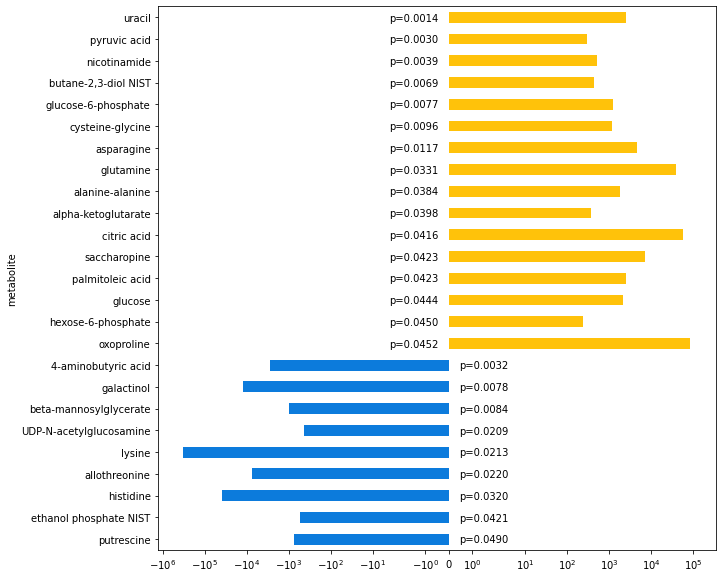

In [152]:
plt.rcParams['figure.figsize'] = [10, 10]

significant_df = ddddf[ddddf['p-value'] < 0.05]
significant_df = significant_df[significant_df['temperature'] == 30]

fig, ax = plt.subplots()

(
    significant_df
        .plot.barh(x='metabolite', y='avg_diff', logx='sym', 
                   # xerr='sum_std',
                   color=significant_df['avg_diff_positive'].map({True: '#FFC20A', False: '#0C7BDC'}),
                   legend=False,
                   ax=ax
                  )
)

for rect, label in zip(ax.patches, significant_df['p-value']):
    ax.text(1.5 if rect.get_width() < 0 else -1.5, 
            rect.get_y(), 
            f"p={label:.4f}",
            ha='center', va='bottom')
    
fig.savefig('/Users/arivlahakis/Desktop/significant_metabolites_30.eps', format='eps', bbox_inches='tight')

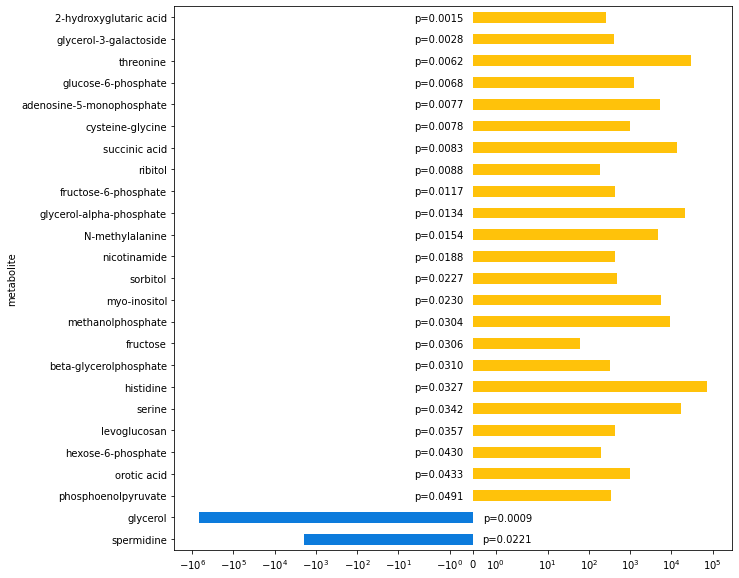

In [153]:
plt.rcParams['figure.figsize'] = [10, 10]

significant_df = ddddf[ddddf['p-value'] < 0.05]
significant_df = significant_df[significant_df['temperature'] == 37]

fig, ax = plt.subplots()

(
    significant_df
        .plot.barh(x='metabolite', y='avg_diff', logx='sym', 
                   # xerr='sum_std',
                   color=significant_df['avg_diff_positive'].map({True: '#FFC20A', False: '#0C7BDC'}),
                   legend=False,
                   ax=ax
                  )
)

for rect, label in zip(ax.patches, significant_df['p-value']):
    ax.text(1.5 if rect.get_width() < 0 else -1.5, 
            rect.get_y(), 
            f"p={label:.4f}",
            ha='center', va='bottom')
    
fig.savefig('/Users/arivlahakis/Desktop/significant_metabolites_37.eps', format='eps', bbox_inches='tight')